In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
# Load dataset
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

In [6]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# Build the model
model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95:
      print('\nAchieved 95% accuracy => cancel training now!')
      self.model.stop_training = True

In [13]:
print('Model training:\n')
callbacks = myCallback()

# Train the model
model.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])

Model training:

Epoch 1/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.3893 - accuracy: 0.8578
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2899 - accuracy: 0.8933
Epoch 3/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.2465 - accuracy: 0.9086
Epoch 4/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.2139 - accuracy: 0.9204
Epoch 5/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1896 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1662 - accuracy: 0.9367
Epoch 7/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1438 - accuracy: 0.9464
Epoch 8/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1267 - accuracy: 0.9518


# Visualizing the Convolutions and Pooling

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

In [14]:
# Check the first 100 labels in test set
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [18]:
# Take 3 examples who have the same label: 0, 23, 28 - they all have label '9'
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

In [20]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

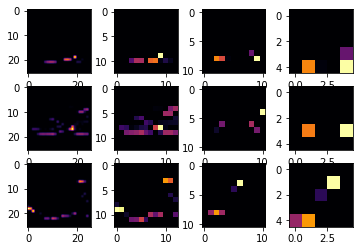

In [23]:
# Arrange the plot grid
f, axarr = plt.subplots(3,4)  

# Plot the output of each layer
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)